In [1]:
# lets learn some nilearn
# but before we do that we have to understand a bit about nii file format

# nibabel is a package that can help us load the nii data 
# used https://nipy.org/nibabel/coordinate_systems.html as refernce
import nibabel as nib


In [2]:
# we get the path of the current directory through pathlib
# this ensures that we dont directly deal with nunaces of 
# different operating systems 
# and let python handle it all 
import pathlib
p = pathlib.Path().absolute()
p

PosixPath('/Users/vaibhavsharma/Documents/Nilearn')

In [3]:
# we have downloaded someones_epi.nii.gz and someones_anatomy.nii.gz in the current folder itself
# https://nipy.org/nibabel/_downloads/c16214e490de2a223655d30f4ba78f15/someones_anatomy.nii.gz 
# https://nipy.org/nibabel/_downloads/f76cc5a46e5368e2c779868abc49e497/someones_epi.nii.gz 
# we exported the zip file, though we can pass the .gz file directly too
'''
anatomical imaging supports high resolution anatomical phenotyping and 
allows long scan times to maximize image resolution in complete 3D.
for high resolution we have to scan for a longer time and thus it is vulnerable to 
patients movement inside the mri machine
'''
nii_ant = 'someones_anatomy.nii' 
'''
Advances in gradient and digital data acquisition technology have made it possible 
to obtain individual MR slices in the time frame of 50-100 msec, 
thus minimizing the effects of patient motion. 
Generically, this acquisition mode is known as echo-planar imaging (EPI). 
'''
nii_epi = 'someones_epi.nii'

In [4]:
import os 
# we form the path to the epi data we have downloaded in current folder 
enii_path = os.path.join(p,nii_epi)
enii_path

'/Users/vaibhavsharma/Documents/Nilearn/someones_epi.nii'

In [5]:
epi_img = nib.load(enii_path)
type(epi_img)

nibabel.nifti1.Nifti1Image

In [6]:
epi_img_data = epi_img.get_fdata()
# we get numpy ndarray when we load the data
type(epi_img_data)

numpy.ndarray

In [7]:
# if you dont change the data used we shall get shape as (53, 61, 33)
# this means we have 53 layers of 2d array with dimentions of 61 and 33 i.e. 61 rows and 33 columns 
epi_img_data.shape

(53, 61, 33)

In [8]:
# quick notes on slicing of ndarray
# this means that we select the 26th layer and rows and coloums
# we have selected the middle layer 
eslice_0 = epi_img_data[26, :, :]


In [9]:
# quick notes on slicing of ndarray
# this means that we select the all the layer and coloums, but only 30th row 
# we have selected the middle row 
eslice_1 = epi_img_data[:, 30, :]


In [10]:
# quick notes on slicing of ndarray
# this means that we select the all the layer and rows, but only 16th col 
# we have selected the middle column
eslice_2 = epi_img_data[:, :, 16]

In [11]:
# we shall use the matplotlib for plotting
import matplotlib.pyplot as plt
def show_slices(slices, title):
    # Number of rows/columns of the subplot grid passed to subplots 
    fig, axes = plt.subplots(1, len(slices))
    # fig is Figure 
    # axes is axes.Axes or array of Axes
    plt.suptitle(title) 
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="middle")

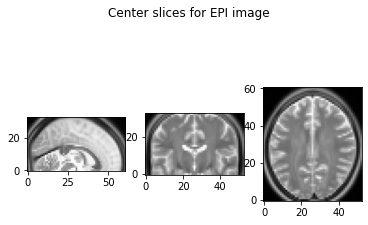

In [13]:
show_slices([eslice_0, eslice_1, eslice_2], title="Center slices for EPI image" )

In [14]:
# let us create the same slice from anatomical data 
# we form the path to the epi data we have downloaded in current folder 
anii_path = os.path.join(p,nii_ant)
anii_path

'/Users/vaibhavsharma/Documents/Nilearn/someones_anatomy.nii'

In [15]:
anat_img = nib.load(anii_path)
type(anat_img)

nibabel.nifti1.Nifti1Image

In [16]:
# if you dont change the data used we shall get shape as (57, 67, 56)
# this means we have 57 layers of 2d array with dimentions of 67 and 56 i.e. 67 rows and 56 columns 
anat_img.shape

(57, 67, 56)

In [17]:
# now lets get the data 
anat_img_data = anat_img.get_fdata()

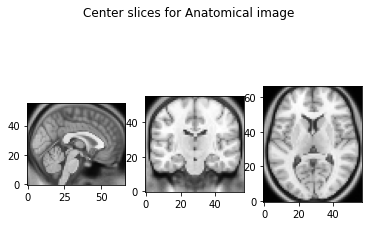

In [18]:
# we pick the middle of the 3d array 
# just to refresh, we are slicing the 3d array to a 2d array which shall be represented on th eplot
show_slices([anat_img_data[28, :, :], anat_img_data[:, 33, :], anat_img_data[:, :, 28]], 
            title="Center slices for Anatomical image")

In [19]:
# now lets have a look at the nilearn itself 
# we import the plotting module from nilearn package 
from nilearn import plotting 

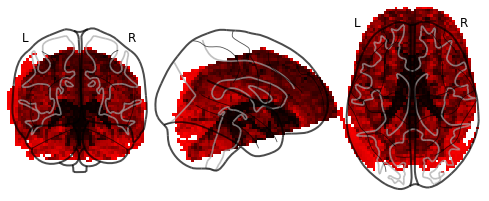

In [31]:
# we shall plot the epi_img 
# we need not to convert the img to data 
plotting.plot_glass_brain(epi_img)  
# we see the miss match in the data and the brain structure 
# orientation matters , we shall look at it

In [ ]:
# we shall refer to multiple examples provided by nilearn 
# https://nilearn.github.io/auto_examples/

In [23]:
# Let us use a Nifti file that is shipped with nilearn
from nilearn.datasets import MNI152_FILE_PATH
print(MNI152_FILE_PATH)

/Users/vaibhavsharma/opt/anaconda3/envs/mcgill/lib/python3.8/site-packages/nilearn/datasets/data/avg152T1_brain.nii.gz


In [26]:
# lets look at the raw data before using nilearn 
ni_img = nib.load(MNI152_FILE_PATH)
ni_img.shape

(91, 109, 91)

In [28]:
ni_i , ni_j, ni_k = ni_img.shape
# we use floor division to get int values 
cni_i = (ni_i - 1) // 2
cni_j = (ni_j - 1) // 2
cni_k = (ni_k - 1) // 2 
# get the data from image 
ni_img_data = ni_img.get_fdata()
type(ni_img_data)

numpy.ndarray

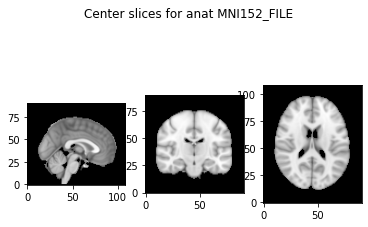

In [32]:
show_slices([ni_img_data[cni_i, :, :], ni_img_data[:, cni_j, :], ni_img_data[:, :, cni_z]], 
            title="Center slices for anat MNI152_FILE")

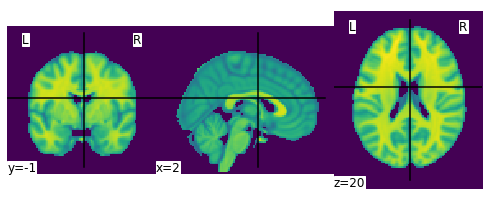

In [33]:
# now look at the same from nilearn 
# look how easy it is to plot the data 
# here we are passing the file path 
from nilearn import plotting
plotting.plot_img(MNI152_FILE_PATH)

In [35]:
# now lets look at the image smoothing functinality of nilearn 
from nilearn import image
# the smoothing value is in mm
# here we are passing the path of the file
smooth_anat_img = image.smooth_img(MNI152_FILE_PATH, fwhm=3)
type(smooth_anat_img)

nibabel.nifti1.Nifti1Image

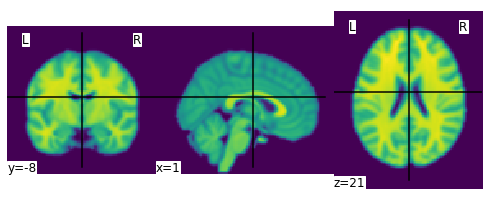

In [38]:
# we can paas it to plotting function as see the result of smoothing function applied 
# here we are passing the in-memory object 
plotting.plot_img(smooth_anat_img)
plotting.show()

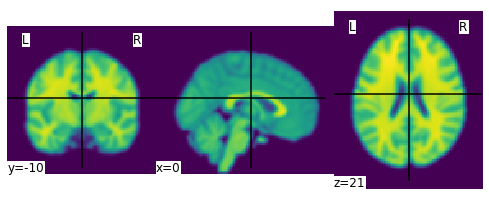

In [39]:
# we can also pass the image object directly to the smooth_img function 
# this time thing would be even more smoother 
plotting.plot_img(image.smooth_img(smooth_anat_img, fwhm=3))
plotting.show()